## 1. Importation des bibliothèques et configuration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1.2 Pour voir toutes les colonnes des dataframes et ainsi obtenir un ascenseur horizontal.

In [237]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 19600)
# on indique la largeur et la longueur en paramètres
plt.rcParams["figure.figsize"] = (15,10)


### 1.3 Etude des datasets disponibles
#### 1.3.1 Je crée ici un dataframe à partir d'un fichier csv Pour faire simple, placer le fichier csv que notre notebook

In [3]:
df1 = pd.read_csv("EdStatsCountry.csv")
df2 = pd.read_csv("EdStatsCountry-Series.csv")
df3 = pd.read_csv("EdStatsSeries.csv")
df4 = pd.read_csv("EdStatsData.csv", sep=",")

##### 1.3.1.1 Le dataset Country (df1)


In [4]:
df1.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
df1.sort_values(["Income Group", "Short Name"])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
11,AUS,Australia,Australia,Commonwealth of Australia,AU,Australian dollar,Fiscal year end: June 30; reporting period for...,East Asia & Pacific,High income: OECD,AU,Original chained constant price data are resca...,2012.0,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 1994",Yes,2011,2010.0,2012.0,2000,NaN
12,AUT,Austria,Austria,Republic of Austria,AT,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,AT,2005,NaN,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011. Population figures compiled from adminis...,NaN,"Income survey (IS), 2000",Yes,2010,2009.0,2012.0,2002,NaN
15,BEL,Belgium,Belgium,Kingdom of Belgium,BE,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,BE,2005,NaN,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2000",Yes,2010,2009.0,2012.0,2007,NaN
33,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,2005,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2000",Yes,2011,2010.0,2012.0,1986,NaN
36,CHL,Chile,Chile,Republic of Chile,CL,Chilean peso,NaN,Latin America & Caribbean,High income: OECD,CL,2008,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2012,NaN,"Integrated household survey (IHS), 2011",Yes,2007,2008.0,2012.0,2007,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,SAS,South Asia,South Asia,South Asia,8S,NaN,South Asia regional aggregate. There are no ec...,NaN,NaN,8S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,SSF,Sub-Saharan Africa (all income levels),Sub-Saharan Africa (all income levels),Sub-Saharan Africa (all income levels),ZG,NaN,Sub-Saharan Africa regional aggregate (includi...,NaN,NaN,ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,SSA,Sub-Saharan Africa (developing only),Sub-Saharan Africa,Sub-Saharan Africa (developing only),ZF,NaN,Sub-Saharan Africa regional aggregate (does no...,NaN,NaN,ZF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

df1 (Country) présente des informations économiques générales pour les pays du monde et les régions auxquelles ils appartiennent. 
On affiche par un diagramme un bâtons ci-dessous la nombre de pays par groupe de revenus pour mieux visualiser la répartition proposée.

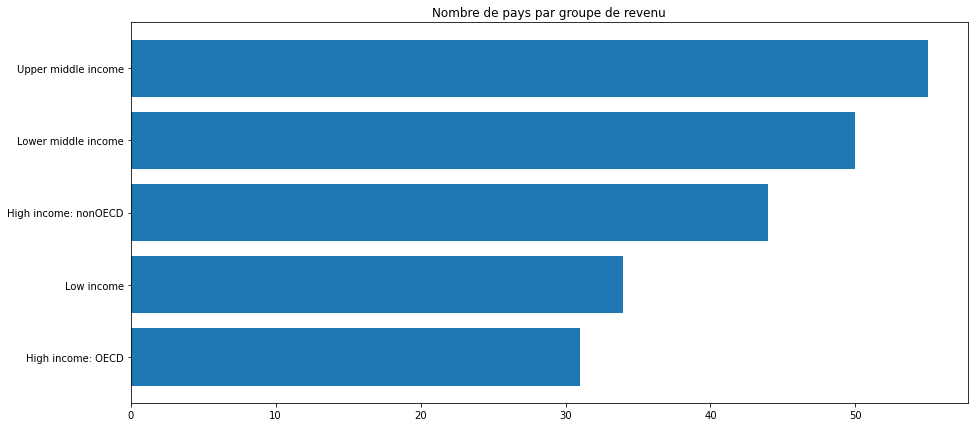

In [6]:
plt.figure(figsize=(15,7))
plt.barh(y = df1.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Income Group'], width = df1.groupby('Income Group')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par groupe de revenu')
plt.show()


On trie ci-dessous les pays selon leur richesse grâce à la variable 'income group'.

In [7]:
OCDE = df1.loc[df1['Income Group'] == 'High income: OECD', :]
OCDE = OCDE["Short Name"].unique().tolist()
OCDE

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Switzerland',
 'Chile',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'United Kingdom',
 'Greece',
 'Ireland',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'New Zealand',
 'Poland',
 'Portugal',
 'Slovak Republic',
 'Slovenia',
 'Sweden',
 'United States']

In [8]:
NON_OCDE = df1.loc[df1['Income Group'] == 'High income: nonOECD', :]
NON_OCDE = NON_OCDE["Short Name"].unique().tolist()
NON_OCDE

['Aruba',
 'Andorra',
 'United Arab Emirates',
 'Antigua and Barbuda',
 'Bahrain',
 'The Bahamas',
 'Bermuda',
 'Barbados',
 'Brunei',
 'Channel Islands',
 'Curaçao',
 'Cayman Islands',
 'Cyprus',
 'Faeroe Islands',
 'Equatorial Guinea',
 'Greenland',
 'Guam',
 'Hong Kong SAR, China',
 'Croatia',
 'Isle of Man',
 'St. Kitts and Nevis',
 'Kuwait',
 'Liechtenstein',
 'Lithuania',
 'Latvia',
 'Macao SAR, China',
 'St. Martin (French part)',
 'Monaco',
 'Malta',
 'Northern Mariana Islands',
 'New Caledonia',
 'Oman',
 'Puerto Rico',
 'French Polynesia',
 'Qatar',
 'Russia',
 'Saudi Arabia',
 'Singapore',
 'San Marino',
 'Sint Maarten (Dutch part)',
 'Turks and Caicos Islands',
 'Trinidad and Tobago',
 'Uruguay',
 'Virgin Islands']

Création d'une liste qui regroupe l'ensemble des pays les plus riches du monde. 

In [9]:
LesPaysRiches = [*OCDE, *NON_OCDE]
LesPaysRiches

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Switzerland',
 'Chile',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'United Kingdom',
 'Greece',
 'Ireland',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'New Zealand',
 'Poland',
 'Portugal',
 'Slovak Republic',
 'Slovenia',
 'Sweden',
 'United States',
 'Aruba',
 'Andorra',
 'United Arab Emirates',
 'Antigua and Barbuda',
 'Bahrain',
 'The Bahamas',
 'Bermuda',
 'Barbados',
 'Brunei',
 'Channel Islands',
 'Curaçao',
 'Cayman Islands',
 'Cyprus',
 'Faeroe Islands',
 'Equatorial Guinea',
 'Greenland',
 'Guam',
 'Hong Kong SAR, China',
 'Croatia',
 'Isle of Man',
 'St. Kitts and Nevis',
 'Kuwait',
 'Liechtenstein',
 'Lithuania',
 'Latvia',
 'Macao SAR, China',
 'St. Martin (French part)',
 'Monaco',
 'Malta',
 'Northern Mariana Islands',
 'New Caledonia',
 'Oman',
 'Puerto Rico',
 'French Polynesia',
 'Qatar',
 'Russia',
 'Saudi Arabia',
 'Si

On tire ainsi une première liste de 75 pays sur les 217 considérés. 
**C'est une idée pour réduire le dataset, mais ce serait aussi se priver de pays très peuplés et en voie de développement qui pourraient faire partie des pays prospectés pour notre étude.**

##### 1.3.1.2 Le dataset Country-Series

In [10]:
df2 = pd.read_csv("EdStatsCountry-Series.csv")
df2.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


 EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv. Ce dataset ne semble pas pertinent pour répondre aux questions posées.

#### 1.3.1.3 Le dataset Data

In [11]:
df4.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.3.1.3.1 Exploration des pays et régions données par ce dataframe

In [12]:
TousLesPays = list (df4["Country Name"].unique())
liste_regions = []
while 'World' in TousLesPays:
    liste_regions.append(TousLesPays.pop(0))
print("Liste des {} régions : de {} à {}".format(len(liste_regions), liste_regions[0], liste_regions[-1]))
print("Liste des {} pays : de {} à {}".format(len(TousLesPays), TousLesPays[0], TousLesPays[-1]))

Liste des 25 régions : de Arab World à World
Liste des 217 pays : de Afghanistan à Zimbabwe


In [239]:
df4.isna().mean().sort_values(ascending=False)

Unnamed: 69                       1.000000
2017                              0.999820
2016                              0.980234
1973                              0.960478
1974                              0.960284
                                    ...   
Country Name                      0.000000
Country Code                      0.000000
Indicator Code                    0.000000
Indicator Name                    0.000000
Indicateur existant selon pays    0.000000
Length: 71, dtype: float64

In [13]:
df4.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

Beaucoup de valeurs manquantes. Des indicateurs très inégalement remplis par année et pays. Il va falloir regarder de près !
**L'opération ci-dessous permet de vérifier d'éventuel doublons. Il n'y en a pas.**

In [14]:
# Les valeurs dupliquées sont les lignes pour lesquelles le même pays et le même indicateur sont les mêmes
duplicates = df4.duplicated(subset=["Country Code","Indicator Code"], keep='first')

if True in list(duplicates.unique()):
    print("Il existe des données dupliquées.")
else:
    print("Il n'y a aucune donnée dupliquée.")

Il n'y a aucune donnée dupliquée.


In [16]:
Pays = df4['Country Name'].unique()
Pays
LesPays = Pays.tolist()
# Suppression des groupement de pays et régions pour n'avoir qu'une liste de pays indépendants
del LesPays[0:25]
df4 = df4.loc[df4['Country Name'].isin(LesPays), :]

On a supprimé les 25 premiers éléments qui ne sont que des régions ou des zones de pays. **Df4 est maintenant composé de 217 pays uniques et indépendants.**

## 2. Sélection des indicateurs les plus pertinents pour l'étude

### 2.1 Création de la liste de tous les indicateurs du df4

In [17]:
tests = pd.DataFrame(df4['Indicator Name'].unique())
tests.to_csv('lesindicateurs2.csv')
tests

,0
0,"Adjusted net enrolment rate, lower secondary, ..."
1,"Adjusted net enrolment rate, lower secondary, ..."
2,"Adjusted net enrolment rate, lower secondary, ..."
3,"Adjusted net enrolment rate, lower secondary, ..."
4,"Adjusted net enrolment rate, primary, both sex..."
...,...
3660,"Youth illiterate population, 15-24 years, male..."
3661,"Youth literacy rate, population 15-24 years, b..."
3662,"Youth literacy rate, population 15-24 years, f..."
3663,"Youth literacy rate, population 15-24 years, g..."


Conclusion : On dispose donc, avec ce dataset, pour chaque pays du monde de 3665 indicateurs. Mais tous ne sont pas pertinents. En effet,
 - 1) Il ne concernent pas tous les pays, ou bien
 - 2) ils ne sont pas renseignés pour les années intéressantes pour nous, ou bien
 - 3) ils ne sont pas assez renseignés, ou bien
 - 4) enfin ils ne donnent pas d'indications pertinentes pour répondre aux questions posées.

On peut faire un premier tri en cherchant les indicateurs qui donnent peu ou pas d'informations pour la période considérée (2000 - 2020). En effet, les indicateurs sociologiques, technologiques et économoiques sur ces seules années sont suffisants pour répondre aux questions posées.

In [18]:
Liste_Colonnes = df4.columns
Liste_Colonnes = Liste_Colonnes.tolist()
del Liste_Colonnes[4:34]
Liste_Colonnes.pop(1)
del Liste_Colonnes [21:39]
Liste_Colonnes

['Country Name',
 'Indicator Name',
 'Indicator Code',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

On supprime maintenant les indicateurs ne donnant aucun paramètre pour les années considérées.

In [19]:
df = df4.loc[df4['Country Name'].isin(LesPays) , Liste_Colonnes]
# On compte le nombre de valeurs manquantes par lignes pour les 18 années considérées (2000 - 2017)
df['NB_NaN'] = df.isna().sum(axis=1)
df = df.sort_values('NB_NaN', ascending=False)
# On élimine les lignes n'ayant aucune donnée
DX = df[df["NB_NaN"]<18]

Indicateurs_restants = pd.DataFrame(DX['Indicator Name'].unique())
Indicateurs_restants.shape

(3653, 1)

In [20]:
DX.groupby('Indicator Name').sum().sort_values('NB_NaN')

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,NB_NaN
Indicator Name,,,,,,,,,,,,,,,,,,,
EGRA: Correct Non-Words Read Per Minute (Mean). Chichewa. 4th Grade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.746140,8.478199,11.369701,0.0,0.0,0.00,0.0,0.0,15
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Chichewa. 2nd Grade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.475085,95.641942,90.206733,0.0,0.0,0.00,0.0,0.0,15
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Chichewa. 4th Grade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.678270,44.733232,39.077492,0.0,0.0,0.00,0.0,0.0,15
EGRA: Listening Comprehension - Share of students with a zero score (%). Chichewa. 4th Grade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.934349,0.839195,9.246933,0.0,0.0,0.00,0.0,0.0,15
EGRA: Listening Comprehension - Share of students with a zero score (%). Chichewa. 2nd Grade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.311335,4.750198,30.668437,0.0,0.0,0.00,0.0,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. No Education. Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.930000,0.000000,0.000000,0.0,0.0,14.32,0.0,0.0,2656
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. No Education. Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.120000,0.000000,0.000000,0.0,0.0,12.16,0.0,0.0,2656
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Lower Secondary. Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.220000,0.000000,0.000000,0.0,0.0,29.48,0.0,0.0,2656


### 2.2 Sélections d'indicateurs

On affiche ci-dessous la fréquence des couples (indicateur/pays) qui ne donne aucune information sur les 18 années considérées. La majorité de ces couples ne donnent rien. Il semble que l'on va pouvoir éliminer des indicateurs. **Mais il faut y regarder de plus près !**

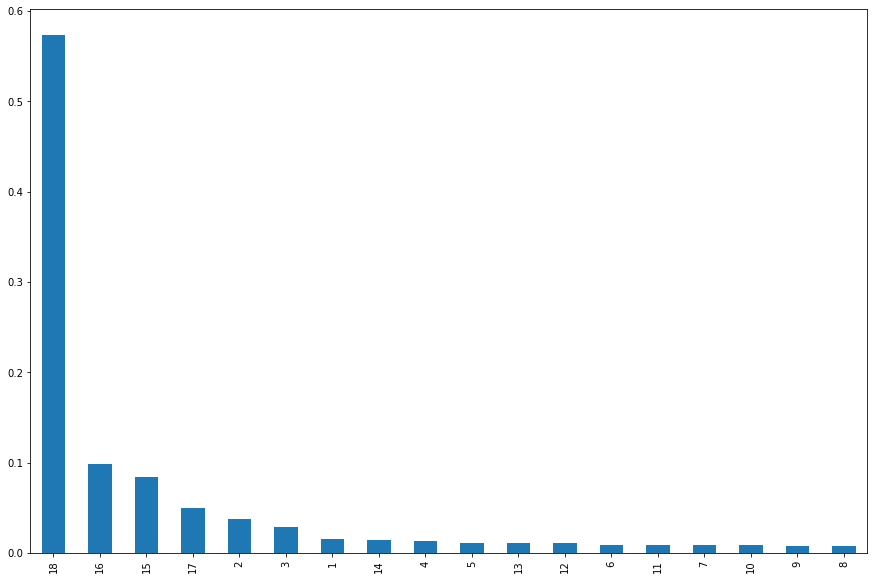

In [21]:
df['NB_NaN'].value_counts(normalize=True).plot(kind='bar')
plt.show()

Si la limitation des années a considérablement réduit notre dataframe, la dernière opération sur les indicateurs n'en a pas éliminé beaucoup. Il vaut mieux opérer un choix qualitatif des indicateurs. 
On peut retenir : 

1) Des indicateurs démographiques et sociologiques

    **Population de jeunes en ages d'être au lycée en 2022**
        "Population, ages 10-18, total"
    **Population d'adultes de moins de 35 ans en 2022**
    

2) Des indicateurs technologiques

    **L'accès à internet.**
            "Internet users (per 100 people)"
    **L'accès à un ordinateur.**
            "Personal computers (per 100 people)"

3) Des indicateurs économiques

    **Le PIB par habitant au plus tard possible**.

4) Des indicateurs éducatifs et culturels

    **Etudier en ligne suppose de l'autonomie.** Les résultats PISA (par exemple) peuvent être un moyen de vérifer la capacité des élèves et étudiants à étudier seuls.
    L'apétence d'une population pour les institutions privées. 
            "PISA: Mean performance on the reading scale"

In [22]:
df4[Liste_Colonnes].groupby('Indicator Name').count().sort_values(by="2010", ascending=False)

,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Indicator Name,,,,,,,,,,,,,,,,,,,,
Population growth (annual %),217,217,215,215,215,215,215,215,215,215,215,215,215,214,214,214,210,210,210,0
"Population, total",217,217,215,215,215,215,215,215,215,215,215,215,215,215,214,214,210,210,210,0
Theoretical duration of primary education (years),217,217,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,178,0
Official entrance age to primary education (years),217,217,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,178,0
Theoretical duration of upper secondary education (years),217,217,205,205,205,205,205,205,205,205,205,205,205,204,204,205,205,205,175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Arabic. 2nd Grade,217,217,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Arabic. 3rd Grade,217,217,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Asante Twi. 2nd Grade,217,217,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
# Contruction d'une liste avec les premiers indicateurs retenus.
Mes_indicateurs = ["Personal computers (per 100 people)",
"PISA: Mean performance on the reading scale",
"Population, ages 0-14, total",
"Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary",
"Barro-Lee: Population in thousands, age 15-19, total",
"GDP per capita (current US$)",
"PISA: Mean performance on the mathematics scale",
"PISA: 15-year-olds by reading proficiency level (%). Level 6",
"Enrolment in tertiary education per 100,000 inhabitants, both sexes",
"Population, ages 10-18, total",
"Percentage of enrolment in secondary education in private institutions (%)",
"Internet users (per 100 people)",
"PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test",
"Youth literacy rate, population 15-24 years, both sexes (%)",
"Enrolment in secondary education, both sexes (number)",
"Percentage of enrolment in tertiary education in private institutions (%)",
"Personal computers (per 100 people",]

#### 2.2.1 Etude de la pertinence des indicateurs retenues (Contiennent-ils assez de données?)

A partir de ces indicateurs choisis, on évalue le taux de remplissage par année et par indicateur. **C'est un tableau important, il nous permet de vérifier la pertinence d'un indicateur.**

In [24]:
DF1 = df.loc[df['Indicator Name'].isin(Mes_indicateurs), Liste_Colonnes]
dflimité = DF1.groupby('Indicator Name').count().sort_values(by="2010", ascending=False)
# dflimité.loc[dflimité[Mes_indicateurs, :]]
dflimité

,Country Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Indicator Name,,,,,,,,,,,,,,,,,,,,
GDP per capita (current US$),217,217,199,199,203,203,204,204,205,204,203,202,203,203,199,200,197,196,189,0
Internet users (per 100 people),217,217,196,197,199,193,196,198,197,204,203,202,202,204,202,201,201,201,201,0
"Population, ages 0-14, total",217,217,194,194,194,194,194,194,194,194,194,194,194,194,193,193,191,191,191,0
"Population, ages 10-18, total",217,217,190,191,192,192,191,191,187,181,181,181,181,181,181,181,181,181,0,0
"Enrolment in secondary education, both sexes (number)",217,217,149,151,150,146,158,158,149,157,154,153,151,156,150,141,141,123,8,0
Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,217,217,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0
"Barro-Lee: Population in thousands, age 15-19, total",217,217,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0
"Enrolment in tertiary education per 100,000 inhabitants, both sexes",217,217,121,121,130,133,131,128,126,124,130,135,136,138,132,123,93,4,0,0
Percentage of enrolment in secondary education in private institutions (%),217,217,95,97,111,105,110,115,118,118,120,121,130,135,131,131,131,115,6,0


Création de ce tableau au format xls pour l'afficher dans un powerpoint

In [25]:
IndicateursPertinents = "IndicateursPertinents.xlsx"
tableau1= dflimité.to_excel(IndicateursPertinents)

Text(0.5, 1.0, 'Nombre dindicateurs renseignés pour une année étudiée (2010)')

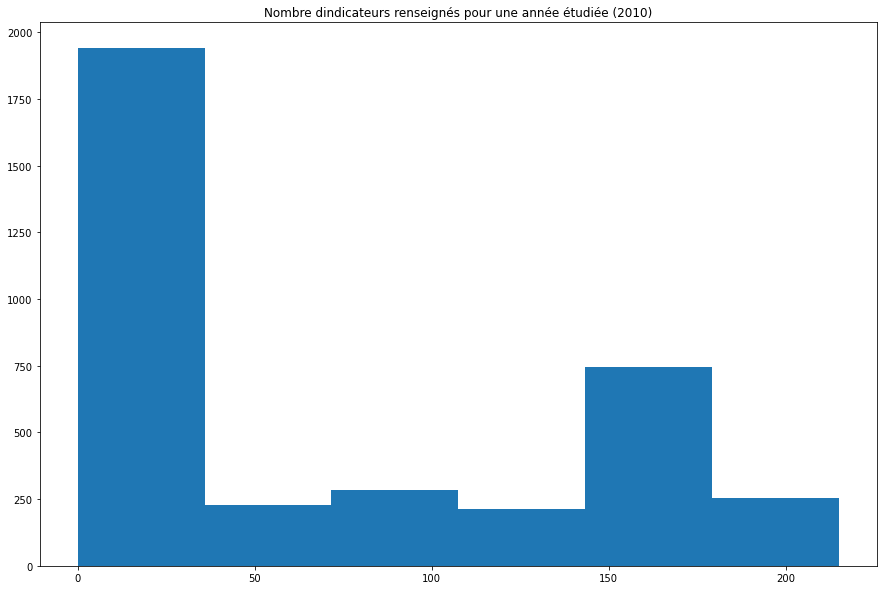

In [245]:
# On compte, pour chaque ligne (ou couple pays/indicateur) si il y a des données complétées
# On ajoute une colonne 0 si il n'existe pas de donnée, et 1 sinon
année = ['2010']
def non_nul(value):
    if value==0:
        return 0
    else:
        return 1

df4['Indicateur existant selon pays'] = df4.loc[:, année].count(axis=1)
Data_CD = df4.pivot_table('Indicateur existant selon pays', index=['Indicator Name'], columns=[
                           'Country Name'], aggfunc="sum")

# Nous sommons sur la ligne pour avoir le nombre de pays qui ont renseignés l'indicateur
Data_CD['total'] = Data_CD.loc[:,LesPays].sum(axis=1)
plt.hist(Data_CD["total"].sort_values(ascending=False), 6)
plt.title('Nombre d''indicateurs renseignés pour une année étudiée (2010)')

In [243]:
Data_CD

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,"Egypt, Arab Rep.",El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Faroe Islands,Fiji,Finland,France,French Polynesia,Gabon,"Gambia, The",Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,"Hong Kong SAR, China",Hungary,Iceland,India,Indonesia,"Iran, Islamic Rep.",Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,"Korea, Dem. People’s Rep.","Korea, Rep.",Kosovo,Kuwait,Kyrgyz Republic,Lao PDR,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,"Macao SAR, China","Macedonia, FYR",Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russian Federation,Rwanda,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Martin (French part),St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,total
Indicator Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,106
"Adjusted net enrolment rate, lower secondary, female (%)",0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,103
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,

In [30]:
df4.isna().mean()

Country Name                      0.000000
Country Code                      0.000000
Indicator Name                    0.000000
Indicator Code                    0.000000
1970                              0.913768
                                    ...   
2090                              0.935713
2095                              0.935713
2100                              0.935713
Unnamed: 69                       1.000000
Indicateur existant selon pays    0.000000
Length: 71, dtype: float64

Création d'une cellule pour déterminer la pertinence d'un indicateur. Il suffit de changer l'intitulé de l'indicateur.

In [31]:
Indicateur = DF1.loc[DF1['Indicator Name']=="Population, ages 0-14, total", Liste_Colonnes]
# Indicateur.loc[Indicateur['2006'].isna(), '2006'] = Indicateur['2006'].median()
# Indicateur['Moyenne'] = Indicateur.iloc[:, 3:9].mean(axis=1)
# Indicateur['Moyenne'].isna()
# Indicateur['Moyenne'].isna().mean()
Indicateur.isna().mean()


Country Name      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2000              0.105991
2001              0.105991
2002              0.105991
2003              0.105991
2004              0.105991
2005              0.105991
2006              0.105991
2007              0.105991
2008              0.105991
2009              0.105991
2010              0.105991
2011              0.105991
2012              0.110599
2013              0.110599
2014              0.119816
2015              0.119816
2016              0.119816
2017              1.000000
dtype: float64

## 3. Résultats sur les différents indicateurs retenus
#### 3.1 Appétence pour les institutions privées

In [330]:
PRIVATE = DF1.loc[DF1['Indicator Name'] == "Percentage of enrolment in secondary education in private institutions (%)",["Country Name", '2013']]
PRIVATE2 = DF1.loc[DF1['Indicator Name'] == "Percentage of enrolment in tertiary education in private institutions (%)",["Country Name", '2014']]

# Connaître le taux de pays pour lequel je n'ai pas cette donnée : 
# PRIVATE.isna().mean()
# avec la méthode info(), j'apprends le nombre de pays pour lesquels je n'ai pas d'info. 
# PRIVATE.info()
PRIVATE = PRIVATE.sort_values('2013', ascending=False)
PRIVATE2 = PRIVATE2.sort_values('2014', ascending=False)
PRIVATEmerge = pd.merge(PRIVATE, PRIVATE2, on = 'Country Name')
PRIVATEmerge= PRIVATEmerge.sort_values('2014', ascending=False)
PRIVATEmerge.head(100)


,Country Name,2013,2014
4,United Kingdom,66.039421,100.000000
164,Sint Maarten (Dutch part),NaN,100.000000
214,Liechtenstein,NaN,100.000000
118,Latvia,1.882750,92.251678
97,West Bank and Gaza,6.466670,85.866737
...,...,...,...
87,Germany,9.015780,8.308320
188,Morocco,NaN,8.045150
98,Tunisia,6.390230,7.841720
116,Croatia,2.201250,7.544820


#### 3.2 Richesse

In [33]:
Richesse = DF1.loc[DF1['Indicator Name'] == "GDP per capita (current US$)", Liste_Colonnes]
Richesse = Richesse.sort_values('2013', ascending=False)
Richesse= Richesse.loc[:, ['Country Name', '2013']]
Richesse

,Country Name,2013
507015,Liechtenstein,173528.150454
514345,Luxembourg,113625.132900
627960,Norway,103059.248228
518010,"Macao SAR, China",89524.844361
671940,Qatar,88304.879575
...,...,...
785555,Syrian Arab Republic,NaN
316435,Eritrea,NaN
503350,Libya,NaN
569320,Monaco,NaN


#### 3.3.3 Résultats scolaires

Mise en place d'une liste pour sélectionner les années ou les test PISA est fait. 

In [34]:
PISA_LISTE = []
for i in range(6):
 PISA_LISTE.append(2000+3*i)
#  pour convertir ma liste de int en liste de str
PISA_LISTE = list(map(str, PISA_LISTE))
PISA_LISTE.append('Country Name')

##### 3.3.3.1 Pisa en Mathématiques

In [35]:
PISA = DF1.loc[DF1['Indicator Name'] == "PISA: Mean performance on the mathematics scale", PISA_LISTE]
PISA['Moyenne'] = PISA.mean(axis=1)
PISA = PISA.sort_values('Moyenne', ascending=False)
# PISA = PISA.loc[PISA[:, ['Country Name', 'Moyenne']]]
# Connaître le taux de pays pour lequel je n'ai pas cette donnée : 
PISA.isna().mean()
# PISA = PISA.loc[:, 3]
PISAMATH = PISA.loc[:, ["Country Name", 'Moyenne']]
PISAMATH.head(5)


C:\Users\DELL\AppData\Local\Temp/ipykernel_6648/3687328703.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  PISA['Moyenne'] = PISA.mean(axis=1)


,Country Name,Moyenne
244188,China,581.349296
716973,Singapore,566.558919
405448,"Hong Kong SAR, China",553.590587
471418,"Korea, Rep.",543.464540
449428,Japan,535.346488


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

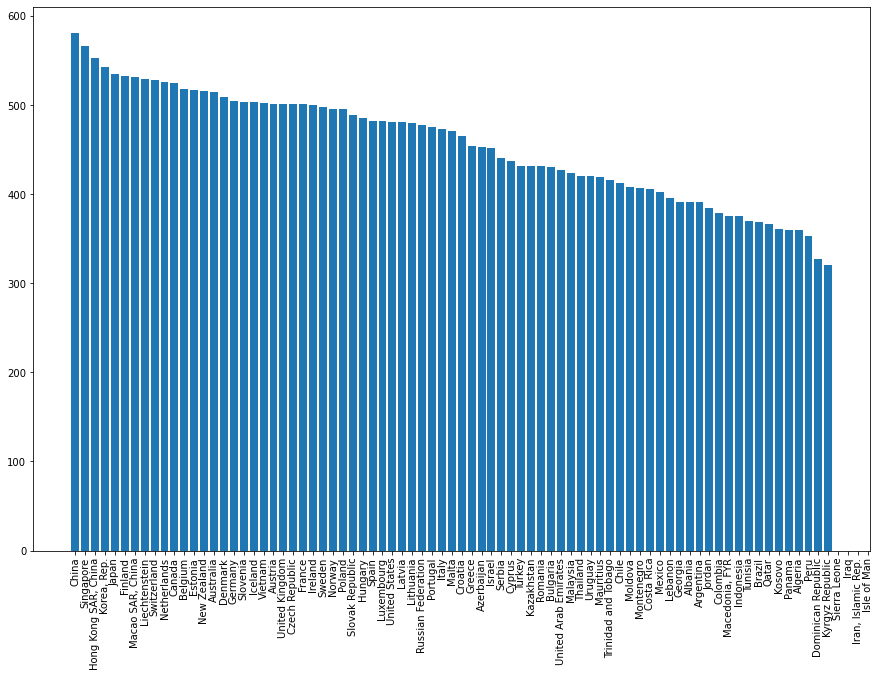

In [230]:
plt.bar(height=PISA['Moyenne'], x=PISA['Country Name'])
plt.xticks(rotation=90) 

##### 3.3.3.2 Pisa en lecture et fusion de ces deux indicateurs PISA

In [37]:
PISA_2 = DF1.loc[DF1['Indicator Name'] == "PISA: Mean performance on the reading scale", PISA_LISTE]
PISA_2['MoyenneRead'] = PISA_2.mean(axis=1)
# PISA_2 = PISA_2.sort_values('MoyenneRead', ascending=False)
# PISA['Futur'] = PISA.interpolate(method='linear', inplace=True)
# Connaître le taux de pays pour lequel je n'ai pas cette donnée : 
#PISA_2.isna().mean()
PISA_2.sort_values('MoyenneRead', ascending = False)
PISAREAD = PISA_2.loc[:, ["Country Name", 'MoyenneRead']]

MERGEPISA = pd.merge(PISAMATH, PISAREAD, on='Country Name')
MERGEPISA['ScorePIsa'] = MERGEPISA.mean(axis=1)
MERGEPISA.sort_values('ScorePIsa', ascending = 'False')
MERGEPISA = MERGEPISA.loc[:, ['Country Name','ScorePIsa']]
MERGEPISA.head(5)

C:\Users\DELL\AppData\Local\Temp/ipykernel_6648/2935584332.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  PISA_2['MoyenneRead'] = PISA_2.mean(axis=1)
C:\Users\DELL\AppData\Local\Temp/ipykernel_6648/2935584332.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  MERGEPISA['ScorePIsa'] = MERGEPISA.mean(axis=1)


,Country Name,ScorePIsa
0,China,560.567602
1,Singapore,550.481551
2,"Hong Kong SAR, China",541.418900
3,"Korea, Rep.",539.012449
4,Japan,525.353653


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

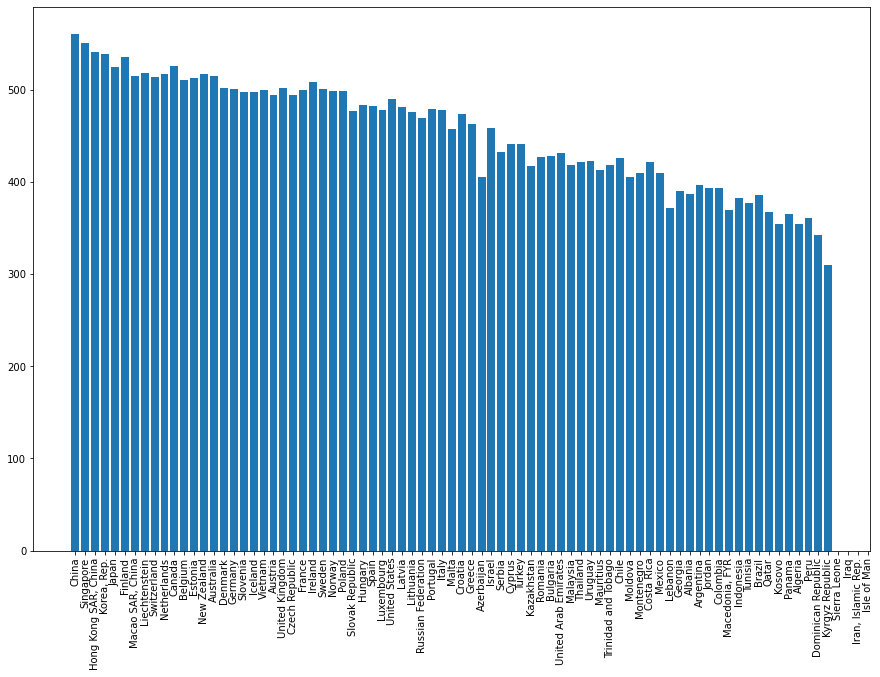

In [411]:
plt.bar(height=MERGEPISA['ScorePIsa'], x=PISA['Country Name'])
axes = plt.gca()
axes.set_ylim(0,590)
plt.xticks(rotation=90) 

#### 3.4 Accès à internet.

In [39]:
Internet = DF1.loc[DF1['Indicator Name'] == "Internet users (per 100 people)",:]

Internet = Internet.sort_values('2016', ascending=False)
# Internet['2016'] = Internet.interpolate(method='linear', axis=0,  limit_direction='forward')
# Connaître le taux de pays pour lequel je n'ai pas cette donnée : 
Internet.isna().mean()
# Internet = Internet.loc[Internet['2016']>50, ['Country Name', '2016']]
# Internet.loc[Internet['2016'].isna()
Internet

,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Indicateur existant selon pays
411855,Iceland,Internet users (per 100 people),IT.NET.USER.P2,44.470534,49.392995,79.120000,83.140000,83.880000,87.000000,89.510000,90.600000,91.00,93.00,93.39,94.819687,96.209800,96.54680,98.160000,98.200000,98.240016,NaN,1
507145,Liechtenstein,Internet users (per 100 people),IT.NET.USER.P2,36.515230,45.116853,59.470711,58.809692,64.007448,63.371356,64.214161,65.080218,70.00,75.00,80.00,85.000000,89.407700,93.80000,95.210000,96.641195,98.093904,NaN,1
169965,Bermuda,Internet users (per 100 people),IT.NET.USER.P2,42.949860,47.509700,52.031597,56.522012,60.990867,65.447066,69.899655,74.350594,82.30,83.25,84.21,88.336000,91.299305,95.30000,96.800000,98.323610,98.000000,NaN,1
144310,Bahrain,Internet users (per 100 people),IT.NET.USER.P2,6.153733,15.038634,18.050721,21.554945,21.458681,21.303734,28.243952,32.910000,51.95,53.00,55.00,76.999966,88.000000,90.00004,90.503133,93.478301,97.999981,NaN,1
107660,Andorra,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.04,78.53,81.00,81.000000,86.434425,94.00000,95.900000,96.910000,97.930637,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235935,Channel Islands,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
639085,Palau,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,20.243939,21.601527,26.970333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
690395,San Marino,Internet users (per 100 people),IT.NET.USER.P2,48.799495,50.341669,50.834840,50.003453,50.566343,50.259564,50.208659,50.364822,54.52,54.21,NaN,49.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
466830,"Korea, Dem. People’s Rep.",Internet users (per 100 people),IT.NET.USER.P2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1


#### 3.5 Accès à un ordinateur

In [40]:
Computer = DF1.loc[DF1['Indicator Name'] == "Personal computers (per 100 people)",:]
Computer = Computer.loc[Computer['2004']>30, ['Country Name', '2004']]
Computer.head(5)

,Country Name,2004
848699,United States,75.742688
335599,Finland,48.103222
441884,Italy,31.149671
134024,Austria,57.718899
159679,Belgium,34.738128


C'est indicateur est très vide et ne donne plus guère d'informations après 2004. Préférons nous en passer !

#### 3.6 Population visée :  Personnes de 15 à 30 ans en 2022

In [374]:
Jeunes = DF1.loc[DF1['Indicator Name'] == "Population, ages 10-18, total", ['Country Name','2015']]
Jeunes = Jeunes.drop(Jeunes.loc[:, '2016':'2100'].columns, axis = 1)
Jeunes = Jeunes.sort_values('2015', ascending=False)
Jeunes.isna().mean()

Country Name    0.000000
2015            0.165899
dtype: float64

In [390]:
Jeunes = DF1.loc[DF1['Indicator Name'] == "Population, ages 10-18, total", ['Country Name','2015']]
# 
Jeunes = Jeunes.drop(Jeunes.loc[:, '2016':'2100'].columns, axis = 1)
Jeunes = Jeunes.sort_values('2015', ascending=False)
Jeunes['Proportion'] = Jeunes['2015']/(Jeunes['2015'].sum())
# Connaître le taux de pays pour lequel je n'ai pas cette donnée : 
Jeunes.isna().mean()


Country Name    0.000000
2015            0.165899
Proportion      0.165899
dtype: float64

#### 3.7 Taux d'alphabétisation

In [454]:
ALPHA1 = df.loc[df4['Indicator Name'] == 'Youth literacy rate, population 15-24 years, both sexes (%)', ['Country Name','2011']]
ALPHA = ALPHA1.loc[ALPHA1['2011']>10, :]
ALPHA1.isna().mean()

Country Name    0.000000
2011            0.737327
dtype: float64

Cet indicateur est mal rempli et ne permettra pas de distinguer un pays d'un autre. Les taux d'alphabétisation sont très élevés pour tous les pays ou presque.

#### 3.8 **Résultats =  On attribut maintenant à chacun de ces inicateur des seuils qui permettront de limiter leur nombre.**

In [414]:
Taux_Internet = Internet.loc[Internet['2016']>60, ['Country Name', '2016']]
Taux_Richesse= Richesse.loc[Richesse['2013']>10000, ['Country Name', '2013']]
Taux_Jeunes = Jeunes.loc[Jeunes['2015']>5000000, :]
Taux_PISA = MERGEPISA.loc[MERGEPISA['ScorePIsa']>350, ['Country Name','ScorePIsa']]
Taux_PRIVATE= PRIVATEmerge.loc[PRIVATEmerge['2013']>0, :]


In [416]:
PremierMerge = pd.merge(Taux_Richesse, Taux_Internet, on='Country Name')
PremierMerge

,Country Name,2013,2016
0,Liechtenstein,173528.150454,98.093904
1,Luxembourg,113625.132900,97.493930
2,Norway,103059.248228,97.298204
3,"Macao SAR, China",89524.844361,81.642985
4,Qatar,88304.879575,94.291118
...,...,...,...
60,Croatia,13574.740089,72.697306
61,Argentina,12976.636425,70.150764
62,Antigua and Barbuda,12194.608761,73.000000
63,Malaysia,10882.289104,78.788310


In [428]:
ListePays = PremierMerge['Country Name'].unique().tolist()
NewMerge = pd.merge(PremierMerge, Taux_Jeunes, on='Country Name')
NewMerge2= pd.merge(NewMerge, Taux_PISA, on = 'Country Name')
NewMerge3 = pd.merge(NewMerge2, Taux_PRIVATE, on = 'Country Name')

# inplace = true pour garder les autres colonnes avec le même nom et au même endroit
NewMerge3.rename(columns={'2013_x':'Richesse', '2016':'Internet', '2015': "Jeunes", '2013_y': 'Privé', '2014':'Privé_en_Sup.'}, inplace = True)
NewMerge3

,Country Name,Richesse,Internet,Jeunes,Proportion,ScorePIsa,Privé,Privé_en_Sup.
0,United States,52787.026949,76.176737,38835370.0,0.035641,490.113658,8.091580,27.525360
1,Germany,46530.911428,89.647101,6993843.0,0.006419,501.119110,9.015780,8.308320
2,United Kingdom,42724.067884,94.775801,6377364.0,0.005853,502.341861,66.039421,100.000000
3,France,42554.122054,85.622200,6992356.0,0.006417,499.755561,26.121189,20.783800
4,Japan,40454.447458,92.000000,10575753.0,0.009706,525.353653,19.544680,78.804207
5,Russian Federation,15543.676532,76.409085,12186691.0,0.011184,469.926255,1.014960,13.639840
6,Argentina,12976.636425,70.150764,6069552.0,0.005570,396.630462,26.231070,25.772640


In [418]:
Pays_Recommandés = list(NewMerge3['Country Name'])
Pays_Recommandés

['United States',
 'Germany',
 'United Kingdom',
 'France',
 'Japan',
 'Russian Federation',
 'Argentina']

#### 3.9 Représentations graphiques de quelques résultats

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

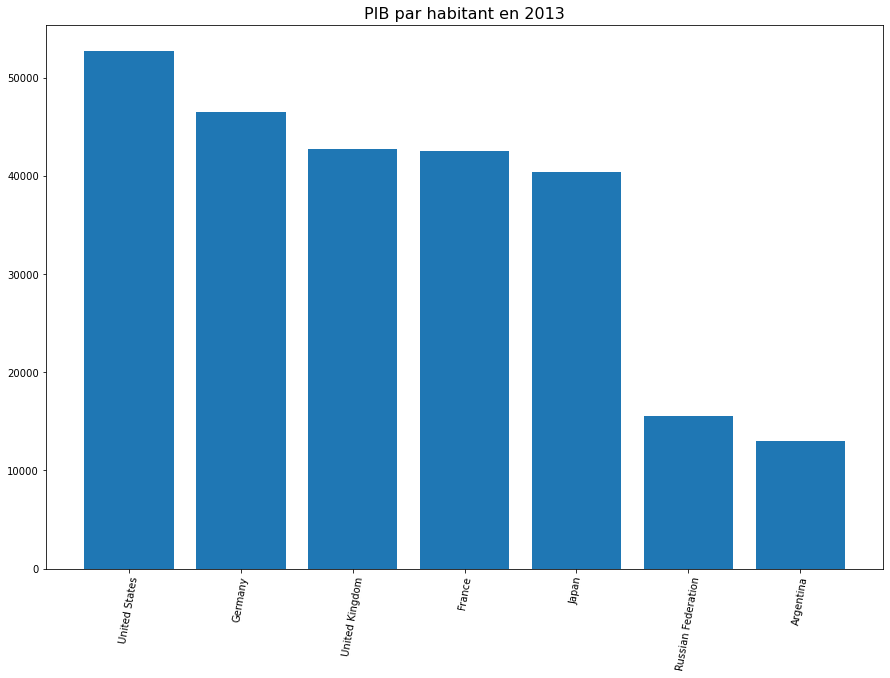

In [419]:
plt.bar(NewMerge3['Country Name'], NewMerge3['Richesse'])
plt.title("PIB par habitant en 2013", fontsize=16)
plt.xticks(rotation=80) 

Text(0.5, 1.0, 'Population visée (jeunes de 15 à 25 ans) en 2022')

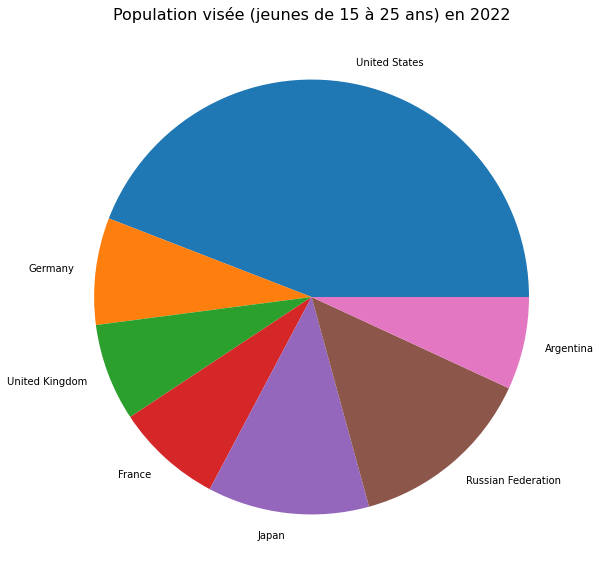

In [427]:
plt.pie(x = NewMerge3['Jeunes'], labels=NewMerge3['Country Name'])
plt.title("Population visée (jeunes de 15 à 25 ans) en 2022", fontsize=16)

In [421]:
Jeunes

,Country Name,2015,Proportion
416582,India,222368315.0,0.204080
244327,China,160035396.0,0.146873
849052,United States,38835370.0,0.035641
420247,Indonesia,38360610.0,0.035206
621822,Nigeria,37729026.0,0.034626
...,...,...,...
226002,Cayman Islands,NaN,NaN
640147,Palau,NaN,NaN
548522,Marshall Islands,NaN,NaN
464227,Kiribati,NaN,NaN


array([[<AxesSubplot:title={'center':'2015'}>,
        <AxesSubplot:title={'center':'Proportion'}>]], dtype=object)

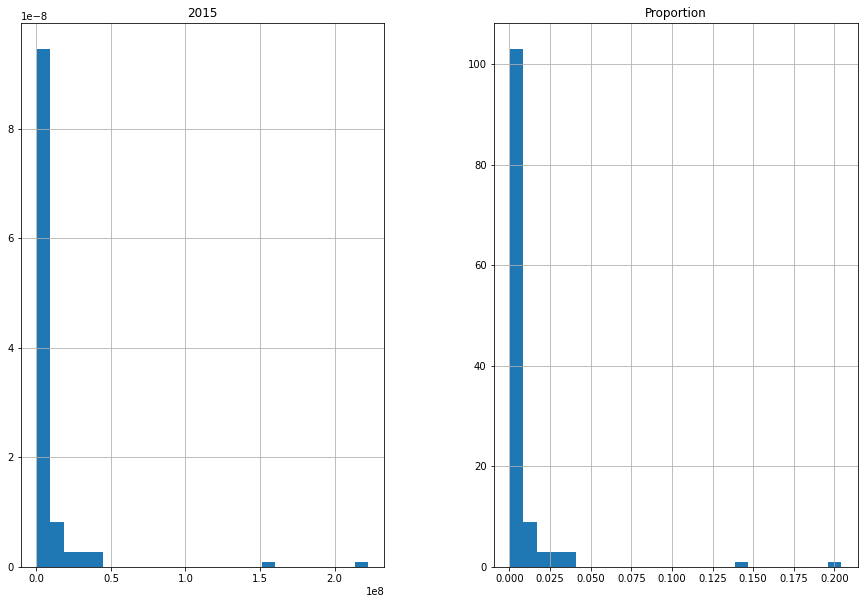

In [422]:
Jeunes.loc[Jeunes['2015']>500000, :].hist(density= True, bins=25)

(array([173.,   6.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([1.32250000e+04, 2.22487340e+07, 4.44842430e+07, 6.67197520e+07,
        8.89552610e+07, 1.11190770e+08, 1.33426279e+08, 1.55661788e+08,
        1.77897297e+08, 2.00132806e+08, 2.22368315e+08]),
 <BarContainer object of 10 artists>)

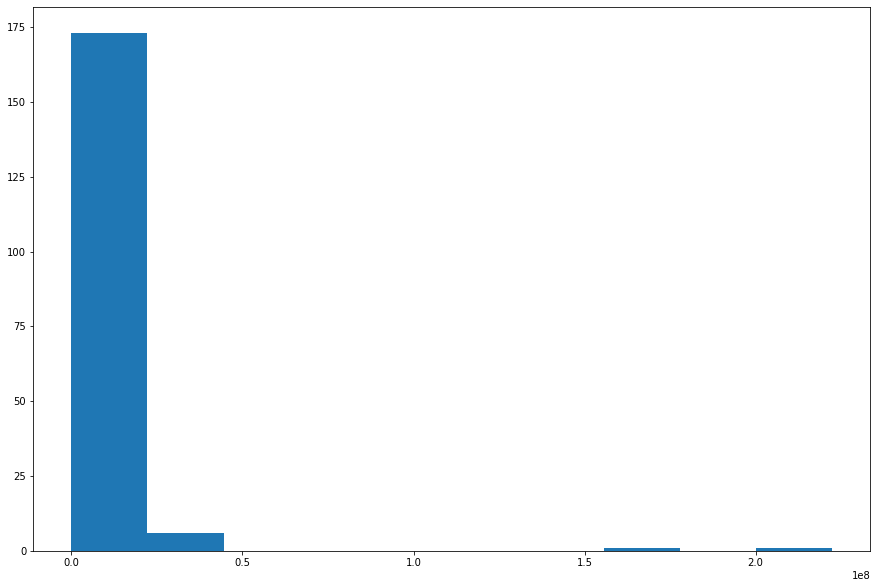

In [289]:
plt.hist(Jeunes['2015'])

## 4. Prédictions pour les pays identifiés

In [423]:
temp1 = df4.loc[:,"2020":"2100"]
temp2 = df4.loc[:, ['Country Name', 'Indicator Name']]
prospect1 = pd.concat([temp2, temp1], axis=1)
prospect2 = prospect1.groupby('Indicator Name').count()
prospect2["Somme"] = (prospect2.loc[:, "2020":"2100"]).sum(axis=1)
prospect2
Final =prospect2.sort_values("Somme", ascending=False)
mask = Final['Somme'] == 0
Final = Final[~mask]
Final

,Country Name,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Somme
Indicator Name,,,,,,,,,,,,,,,,,,,
Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Post Secondary. Total,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Upper Secondary. Female,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. No Education. Total,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Female,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Male,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Post Secondary. Female,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822
Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Post Secondary. Male,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822
Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Post Secondary. Total,217,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,2822


On a donc 308 indicateurs de prédications, tous issu des projection de l'institut Wittgenstein. On manque un peu d'informations à leur sujet. On choisit 2 parmi eux qui nous semblent pertinents pour notre étude.

In [460]:
Indicateurs_de_prospect = ["Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total",
                            "Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total"]

In [471]:
 # On récupère les années pour lesquelles l'indicateur est renseigné
Annees=[]
# On peut choisir ci-dessous l'indicatuer que l'on veut représenter
Indicator = Indicateurs_de_prospect[1]
    
for année in list(df4.loc[:,"1970":"2100"]):
    if df4.loc[df4['Indicator Name']==Indicator, '1970':'2100'].count()[année] != 0: # On compte le nombre de valeurs
        Annees.append(année)
DFAnnees= pd.DataFrame(Annees)
DFAnnees.rename( columns={0 :'Année'}, inplace=True )

In [469]:
B  = df4.loc[ (df4['Indicator Name'] == Indicator) & (df4['Country Name'].isin(Pays_Recommandés)), :]
BVER = B[Annees].T
BVER.columns = Pays_Recommandés
BVER

,United States,Germany,United Kingdom,France,Japan,Russian Federation,Argentina
2010,8850.48,20791.59,34883.13,49976.10,81611.79,5737.05,127112.60
2015,10117.63,22043.80,34849.15,48873.78,81984.07,6413.91,132181.20
2020,11360.02,23245.61,34640.50,47760.87,82161.19,7077.93,136327.64
2025,12581.37,24358.47,34089.67,46096.74,82777.12,7887.27,141029.95
2030,13833.85,25244.06,33399.54,43929.77,83484.59,8871.52,144645.12
2035,15034.92,25860.42,32544.20,41277.08,83292.99,9860.07,146923.68
2040,16145.16,26211.87,31645.01,38292.06,81952.53,10827.81,149456.86
2045,17133.34,26316.51,30628.48,35200.34,79867.80,11774.30,151618.87
2050,18008.54,26243.79,29442.07,32180.69,77720.63,12693.19,153299.51
2055,18773.28,26020.85,28132.72,29333.26,75999.40,13604.50,154645.12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

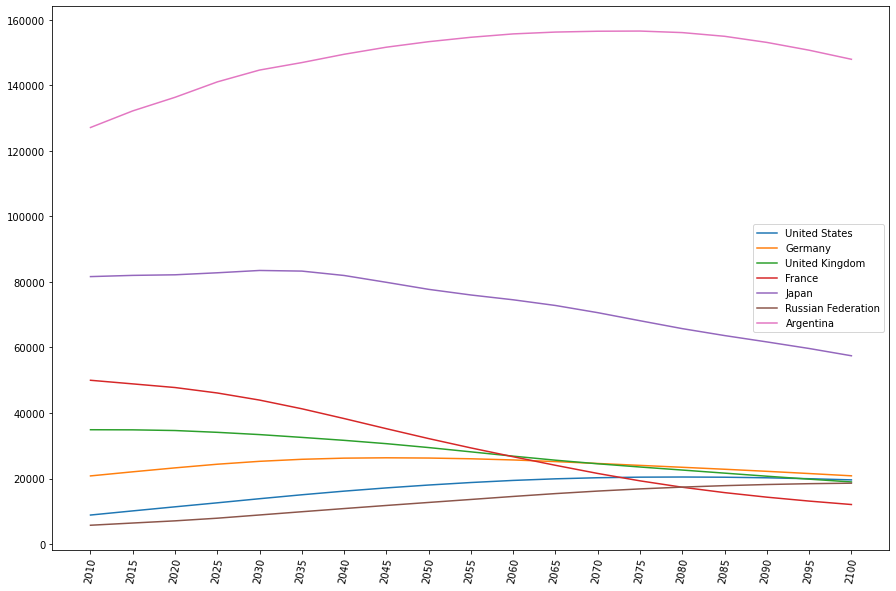

In [470]:
plot = plt.plot(DFAnnees['Année'],BVER)
plt.legend(Pays_Recommandés)
plt.xticks(rotation=80) 